<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT043_2021S1_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T4
```

## **Enunciado**

**1.** Dois algoritmos de aprendizado de máquina são avaliados com relação ao tempo de execução necessário para obter um desempenho pré-estabelecido. Como o tempo de execução depende das entradas apresentadas, é necessário testar os algoritmos considerando diferentes realizações. Na **Tabela 1**, são apresentados os tempos de execução para cada um dos algoritmos (foram executadas 30 realizações). Assumindo que o tempo de execução pode ser modelado por uma distribuição normal, e que os desempenhos dos algoritmos são independentes, compare o desempenho dos dois algoritmos.

## **Importando bibliotecas**



In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statistics as stpy
import matplotlib.pyplot as plt

from scipy.stats import sem, t

## **Obtendo o Conjunto de Dados**




In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/SamuelOliveira/Colab/main/dados_atividade_05.csv')

## **Obtendo Estatisticas Descritivas**




In [ ]:
# obtendo estatisticas descritivas
t1 = dados.loc[dados.ID != 0]['T1']
t2 = dados.loc[dados.ID != 0]['T2']


# Nível de Confiança
tl = 0.95

# Grau de Liberdade
df_t1 = len(t1)-1
df_t2 = len(t2)-1

# Média Amostral
mu_t1 = round(stpy.mean(t1),2)
mu_t2 = round(stpy.mean(t2),2)

# Desvio amostral
sigma_t1 = round(stpy.stdev(data=t1),2)
sigma_t2 = round(stpy.stdev(data=t2),2)

y1 = t.pdf(t1,df_t1, mu_t1, sigma_t1)
y2 = t.pdf(t2,df_t2, mu_t2, sigma_t2)

print("Media T1 {} \nMédia T2 {}".format(round(mu_t1,2), round(mu_t2,2)))
print("Desvio amostral T1 {} \nDesvio amostral T2 {}".format(sigma_t1,2, sigma_t2))

Media T1 3.57 
Média T2 4.21
Desvio amostral T1 1.47 
Desvio amostral T2 2


## **Obtendo Intervalo de Confiança**




1.   Desvio Desconhecido ***t Distribution***


In [ ]:
# Intervalo de Confiança para sigma Desconhecido
ic_t1 = t.interval(alpha=tl, df=df_t1, loc=mu_t1, scale=st.sem(t1))
ic_t1 = [round(ic_t1[0],2), round(ic_t1[1],2)]

ic_t2 = t.interval(alpha=tl, df=df_t2, loc=mu_t2, scale=st.sem(t2))
ic_t2 = [round(ic_t2[0],2), round(ic_t2[1],2)]

print("Intervalo de Confiança T1 {} \nIntervalo de Confiança T2 {}".format(ic_t1, ic_t2))

Intervalo de Confiança T1 [3.02, 4.12] 
Intervalo de Confiança T2 [3.75, 4.67]


## **Obtendo Intersecção Amostras T1 e T2**



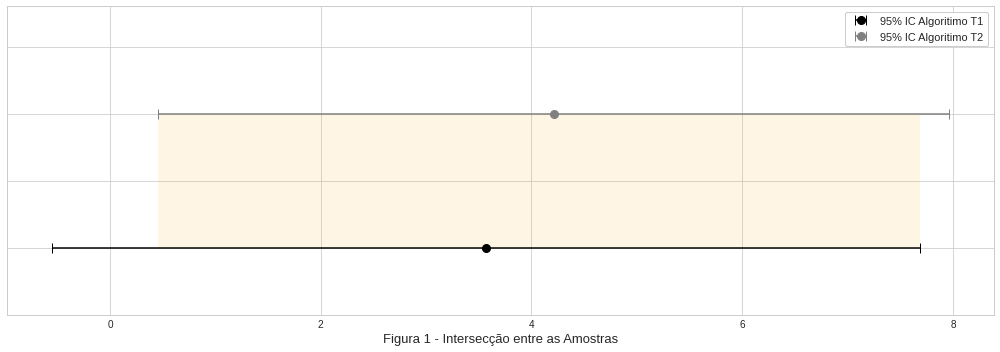

In [ ]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(14, 5))


ax.errorbar(mu_t1, 0, xerr=(ic_t1[1]),
            fmt='o', markersize=8, capsize=5, label='95% IC Algoritimo T1', color='k')

ax.errorbar(mu_t2, 1, xerr=(ic_t2[0]),
            fmt='o', markersize=8, capsize=5, label='95% IC Algoritimo T2', color='grey')

ax.set_ylim(-0.5, 1.8)
ax.fill_betweenx([0, 1], mu_t2-ic_t2[0], mu_t1+ic_t1[1], facecolor='orange', alpha=0.1)

ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
ax.set_xlabel('Figura 1 - Intersecção entre as Amostras', fontsize=13)

ax.yaxis.set_major_formatter(plt.NullFormatter())

fig.tight_layout();

* A análise da **Figura 1** é inconclusiva pois embora exista intersecção entre os intervalos das amostras **Algoritimo 1** e **Algoritimo 2** não se pode concluir qual dos dois algoritimos apresentou melhor desempenho, pela própria declaração do enunciado "*... que os desempenhos dos algoritmos são independentes*"

* Aplicando o mesmo Nível de Confiança *95%* nos dois algoritimos obtivemos IC *(Intervalos de Confiança)* diferentes:
    *   IC Algoritimo 1: [3.02, 4,12], [IC superior] - [IC inferior] = **1.1**, margem de erro maior, **pior em termos probabilísticos**
    *   IC Algoritimo 2: [3.75, 4,67], [IC superior] - [IC inferior] = **0.92**, margem de erro menor, **melhor em termos probabilísticos**

A partir destas observações numéricas, começamos a suspeitar que uma análise das amostras que contém o intervalo poderia nos fornecer mais informações sobre o desempenho comparativos entre os dois algoritimos, T1 e T2.


## **Resoluções Algoritimo 1**



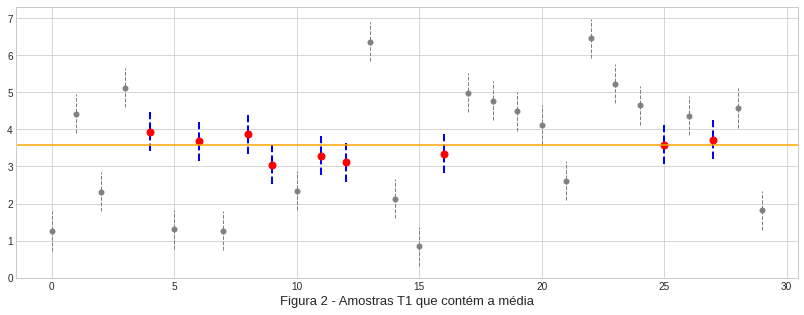

Nível de confiança: 95.0%
Fração de intervalos que contém a média: 30.0%


In [ ]:
# numero de intervalos
Ns = len(t1)
# media populacional
mu = mu_t1
# desvio padrão populacional
sigma = sigma_t1

beta = tl # nivel de confianca
zalpha = 1.96 # valor de z (a partir de beta)
c = 0 # conta o numero de intervalos que contem a media
plt.figure(figsize=(14,5))

for s in range(0,Ns):
    x = t1[s]                                   # amostra
    IC1 = np.mean(x) - zalpha*sigma/np.sqrt(Ns) #intervalo inferior
    IC2 = np.mean(x) + zalpha*sigma/np.sqrt(Ns) #intervalo superior
    is_between = ic_t1[0] <= x <= ic_t1[1]
    if(is_between):
        c =  c + 1
        # mostra o intervalo que contem a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color='blue', linestyles='dashed', lw=2)
        plt.plot(s, np.mean(x), 'o', color='red', markersize=7)
    else:
        # mostra o intervalo em cinza se não contem a media        
        plt.vlines(s, ymin=IC1, ymax=IC2, color='gray', linestyles='dashed', lw=1)
        plt.plot(s, np.mean(x), 'o', color='gray', markersize=5)

mu_Ns = round(c/Ns,2)*100

plt.axhline(y=mu, color='orange') # mostra a media populacional
plt.xlabel('Figura 2 - Amostras T1 que contém a média', fontsize=13)
plt.show()
print('Nível de confiança: {}%'.format(beta*100))
print('Fração de intervalos que contém a média: {}%'.format(mu_Ns))

* A **Figura 2** apresenta um total de 9 amostras 30% que contém o intervalo, observa-se que a **margem de erro** para estas amostras é de **1.1** conforme descrito na etapa *Obtendo Intersecção Amostras T1 e T2*. 

## **Resoluções Algoritimo 2**



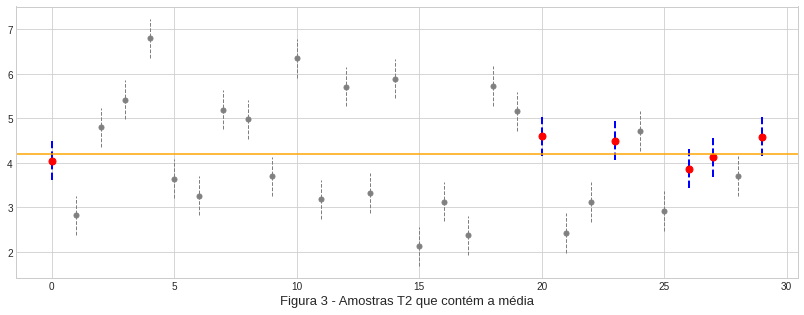

Nível de confiança: 95.0%
Fração de intervalos que contém a média: 20.0%


In [ ]:
# numero de intervalos
Ns = len(t2)
# media populacional
mu = mu_t2
# desvio padrão populacional
sigma = sigma_t2

beta = tl # nivel de confianca
zalpha = 1.96 # valor de z (a partir de beta)
c = 0 # conta o numero de intervalos que contem a media
plt.figure(figsize=(14,5))

for s in range(0,Ns):
    x = t2[s]                                   # amostra
    IC1 = np.mean(x) - zalpha*sigma/np.sqrt(Ns) #intervalo inferior
    IC2 = np.mean(x) + zalpha*sigma/np.sqrt(Ns) #intervalo superior
    is_between = ic_t2[0] <= x <= ic_t2[1]
    if(is_between):
        c =  c + 1
        # mostra o intervalo que contem a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color='blue', linestyles='dashed', lw=2)
        plt.plot(s, np.mean(x), 'o', color='red', markersize=7)
    else:
        # mostra o intervalo em cinza se não contem a media        
        plt.vlines(s, ymin=IC1, ymax=IC2, color='gray', linestyles='dashed', lw=1)
        plt.plot(s, np.mean(x), 'o', color='gray', markersize=5)

mu_Ns = round(c/Ns,2)*100

plt.axhline(y=mu, color='orange') # mostra a media populacional
plt.xlabel('Figura 3 - Amostras T2 que contém a média', fontsize=13)
plt.show()
print('Nível de confiança: {}%'.format(beta*100))
print('Fração de intervalos que contém a média: {}%'.format(mu_Ns))

* A **Figura 3** apresenta um total de 6 amostras 20% que contém o intervalo, observa-se que a **margem de erro** para estas amostras é de **0.92** conforme descrito na etapa *Obtendo Intersecção Amostras T1 e T2*.

## **Conclusões**




No **Algorítimo 1 - T1** um número maior de amostras contém o Intervalo de Confiança do que o **Algorítimo 2 - T2**, 9 e 6 respectivamente.
No entanto, em termos probabilísticos o **Algoritimo T2** seguiu com a menor margem de erro **0.92**, obtendo o **melhor desempenho**.